# Predict diabetes through data analysis.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [6]:
!ls

diabetes.csv  sample_data


In [5]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


위의 문장은 경고를 무시하기 위한 문장으로 없어도 무방하다.

## data preprocessing

In [0]:
dataset = pd.read_csv('diabetes.csv')

In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


  .info() : 해당 데이터프레임의 상세한 정보를 볼 수 있다.  
  데이터의 총 개수(0~n행까지), 데이터의 칼럼명, 데이터의 개수, 데이터의 타입을 확인할 수 있다.  
  반드시 데이터의 타입을 확인해야 한다. 

In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


.describe() : 데이터프레임의 상세한 정보(개수, 평균, 표준편차 등)를 볼 수 있다. 

In [12]:
# Check missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

위의 결과를 보았을 때, 결측치가 0인 것을 알 수 있다. 

In [0]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,[-1]]

X는 0~7행까지로 임신횟수부터 나이까지의 행으로 독립변수이다.  
y는 8행으로 당뇨병의 결과(0,1)를 의미한다. 종속변수이다. 

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


위의 결과를 보았을 때 X에는 Pregnancies~Age 까지의 데이터프레임이고, y는 당뇨병결과(outcome)만 들어있는 데이터프레임인 것을 알 수 있다. 

In [16]:
print("dimension of diabetes data: {}".format(dataset.shape))

dimension of diabetes data: (768, 9)


shape를 통해 데이터셋의 모양을 확인한다.

In [17]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


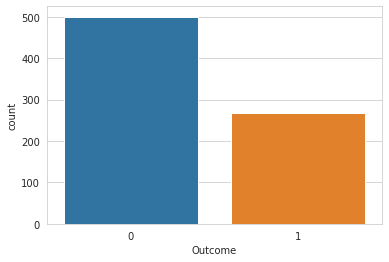

In [18]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(dataset['Outcome'],label="Count")

결과의 개수를 나타낸 표이다.   
당뇨병 아닌 사람 : 500명   
    당뇨병인 사람 : 268명

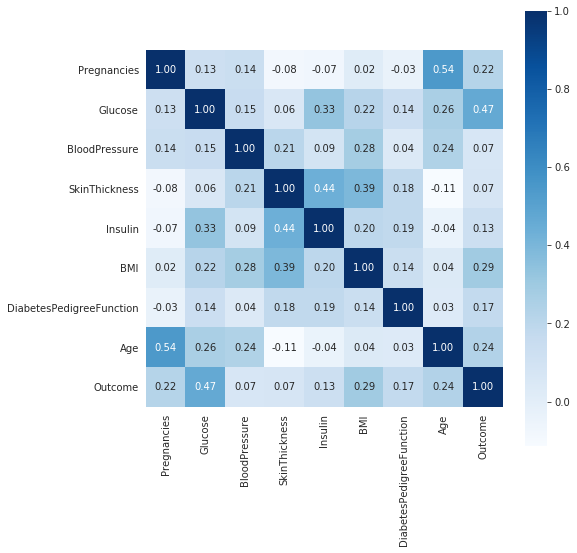

In [19]:
correlation = dataset.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, fmt = '.2f',cmap='Blues', square=True)

상관관계분석을 위하여 heatmap을 작성했다.   
  
0.54 : 나이와 임신횟수  
0.47 : 당뇨병 여부와 글루코오스  
0.44 : 인슐린과 피부두께  
0.39 : BMI와 피부두께  
0.29 : BMI와 당뇨병여부

## k-Nearest Neighbors

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2)

테스트 데이터셋의 비율은 20퍼센트이다. 나머지는 훈련 데이터셋으로 사용한다.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11, 2)

In [0]:
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

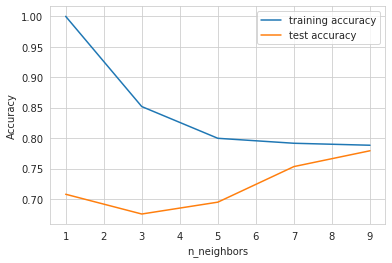

In [23]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.75


## Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(C=1, penalty="l2").fit(X_train, y_train)
logreg2 = LogisticRegression(C=100, penalty="l2").fit(X_train, y_train)
logreg3 = LogisticRegression(C=0.01, penalty="l2").fit(X_train, y_train)

In [26]:
print("C = 1, L2 Training set accuracy: {:.3f}".format(logreg1.score(X_train, y_train)))
print("C = 1, L2 Test set accuracy: {:.3f}".format(logreg1.score(X_test, y_test)))

C = 1, L2 Training set accuracy: 0.790
C = 1, L2 Test set accuracy: 0.747


In [27]:
print("C = 100, L2 Training set accuracy: {:.3f}".format(logreg2.score(X_train, y_train)))
print("C = 100, L2 Test set accuracy: {:.3f}".format(logreg2.score(X_test, y_test)))

C = 100, L2 Training set accuracy: 0.788
C = 100, L2 Test set accuracy: 0.760


In [28]:
print("C = 0.01, L2 Training set accuracy: {:.3f}".format(logreg3.score(X_train, y_train)))
print("C = 0.01, L2 Test set accuracy: {:.3f}".format(logreg3.score(X_test, y_test)))

C = 0.01, L2 Training set accuracy: 0.707
C = 0.01, L2 Test set accuracy: 0.682


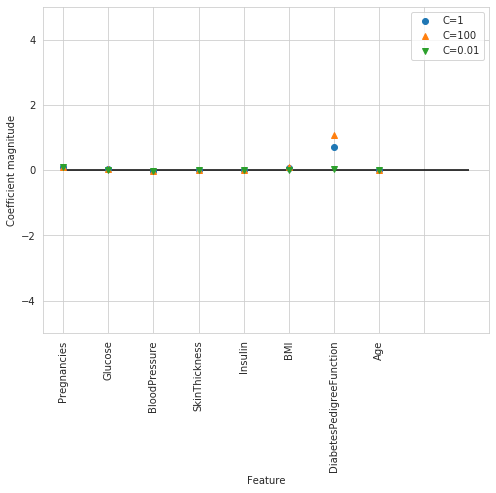

In [29]:
diabetes_features = [x for i,x in enumerate(dataset.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg1.coef_.T, 'o', label="C=1")
plt.plot(logreg2.coef_.T, '^', label="C=100")
plt.plot(logreg3.coef_.T, 'v', label="C=0.01")
plt.xticks(range(dataset.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, dataset.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

위의 그래프를 보면 C=1, C=100일 때, 회귀 계수가 양수가 된다는 것을 볼 수 있다.  
이러한 결과로 인해 당뇨병의 DiabetesPedigreeFunction 속성이 당뇨병과 연관이 깊다는 것을 알 수 있다. 

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.688


In [31]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.762
Accuracy on test set: 0.721


In [32]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.76483675 0.         0.         0.         0.14598955
 0.0392398  0.0499339 ]


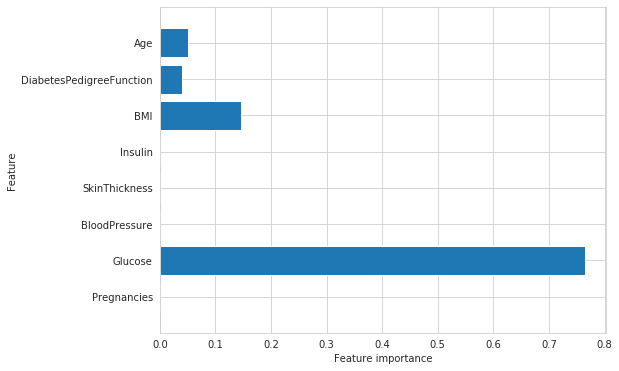

In [33]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [35]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.798
Accuracy on test set: 0.747


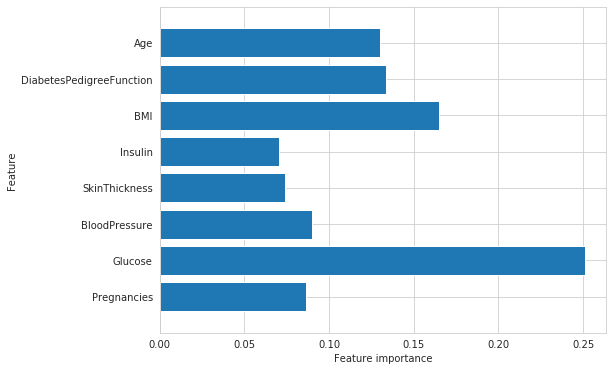

In [36]:
plot_feature_importances_diabetes(rf)

## SVM(SVC)

In [37]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.788
Accuracy on test set: 0.766


## GaussianNB

In [0]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)

In [40]:
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.764
Accuracy on test set: 0.747


In [0]:
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_

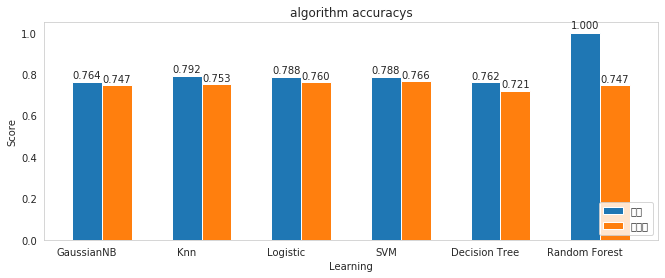

In [47]:
learning = ["GaussianNB", "Knn", "Logistic", "SVM", "Decision Tree", "Random Forest"]

data1 = [nb.score(X_train, y_train), knn.score(X_train, y_train), logreg2.score(X_train, y_train), clf.score(X_train, y_train), tree.score(X_train, y_train), rf.score(X_train, y_train)]
data2 = [nb.score(X_test, y_test), knn.score(X_test, y_test), logreg2.score(X_test, y_test), clf.score(X_test, y_test), tree.score(X_test, y_test), rf.score(X_test, y_test)]

fig, ax = plt.subplots(1,1,figsize=(11,4))
W_ = 0.3

x = np.arange(6)

bar1 = ax.bar(x, data1, align='center', width=W_, label='훈련')
bar2 = ax.bar([i+W_ for i in range(len(data2))], data2, align='center', width=W_, label='테스트')
plt.xticks(x, learning)

for i, bar in enumerate(bar1):
    ax.text(bar.get_x() + bar.get_width() / 2.0, 1.02 * bar.get_height(), '%.3f' % data1[i], ha='center')

for i, bar in enumerate(bar2):
    ax.text(bar.get_x() + bar.get_width() / 2.0, 1.02 * bar.get_height(), '%.3f' % data2[i], ha='center')
    
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Learning')
plt.ylabel('Score')
plt.title('algorithm accuracys')

plt.show()